In [1]:
import matplotlib as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.preprocessing import StandardScaler, PolynomialFeatures

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('/Users/omarcarr/Desktop/Notebooks/DSI-US-5/Projects/Project-2/train.csv')
kaggle = pd.read_csv('/Users/omarcarr/Desktop/Notebooks/DSI-US-5/Projects/Project-2/test.csv')

In [3]:
df.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       330
Lot Area             0
Street               0
Alley             1911
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Mas Vnr Area        22
Exter Qual           0
Exter Cond           0
                  ... 
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area

In [4]:
features_list = [each for each in df.columns if each != 'SalePrice']

In [5]:
X = df[features_list]
y = df['SalePrice']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
X_train.isnull().sum().sort_values()

Id                    0
Heating               0
Heating QC            0
Central Air           0
Electrical            0
1st Flr SF            0
2nd Flr SF            0
Low Qual Fin SF       0
Gr Liv Area           0
Full Bath             0
Half Bath             0
Bedroom AbvGr         0
Kitchen AbvGr         0
Kitchen Qual          0
TotRms AbvGrd         0
Functional            0
Fireplaces            0
Garage Cars           0
Garage Area           0
Paved Drive           0
Wood Deck SF          0
Open Porch SF         0
Enclosed Porch        0
3Ssn Porch            0
Screen Porch          0
Pool Area             0
Misc Val              0
Mo Sold               0
Yr Sold               0
Foundation            0
                   ... 
Lot Area              0
MS Zoning             0
MS SubClass           0
PID                   0
Exterior 2nd          0
Exter Cond            0
Total Bsmt SF         1
BsmtFin SF 1          1
BsmtFin SF 2          1
Bsmt Unf SF           1
Bsmt Full Bath  

In [8]:
top_corr = list(pd.concat([X_train, y_train], axis=1).corr()['SalePrice'].sort_values(ascending=False).index[1:11])

In [9]:
top_corr

['Overall Qual',
 'Gr Liv Area',
 'Garage Cars',
 'Garage Area',
 'Total Bsmt SF',
 '1st Flr SF',
 'Year Built',
 'Year Remod/Add',
 'Full Bath',
 'Mas Vnr Area']

## Imputing `Mas Vnr Area`

*The only column that currently has nulls in it, from my top-ten positively correlated columns, is `Mas Vnr Area`, which indicates the area of masonry veneer on the house.  Comparing it to `Mas Vnr Type`, which the data dictionary says uses `None` for no masonry.  I believe it is justified to replace the `NaN` values in this column with `0` instead.  I am basing this assumption off of the data dictionary.

*I will not impute `Mas Vnr Type` at this time.

In [10]:
#confirming `Mas Vnr Area` is a numerical value:
X_train['Mas Vnr Area'].value_counts().head()

0.0      913
120.0     10
210.0      8
200.0      8
16.0       8
Name: Mas Vnr Area, dtype: int64

In [11]:
X_train[['Mas Vnr Area']] = X_train[['Mas Vnr Area']].fillna(0.0)

/anaconda3/envs/dsi/lib/python3.6/site-packages/pandas/core/frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [12]:
X_train[top_corr].isnull().sum()

Overall Qual      0
Gr Liv Area       0
Garage Cars       0
Garage Area       0
Total Bsmt SF     1
1st Flr SF        0
Year Built        0
Year Remod/Add    0
Full Bath         0
Mas Vnr Area      0
dtype: int64

## Imputing Total Bsmt SF

In [13]:
X_train = X_train[X_train['Total Bsmt SF'].isnull()].fillna(0.0)

In [14]:
X_train.loc[1327, 'Total Bsmt SF'] = 0

In [15]:
X_train[top_corr].isnull().sum()

Overall Qual      0
Gr Liv Area       0
Garage Cars       0
Garage Area       0
Total Bsmt SF     0
1st Flr SF        0
Year Built        0
Year Remod/Add    0
Full Bath         0
Mas Vnr Area      0
dtype: int64

In [16]:
X_train[X_train['Mas Vnr Area'].isnull()][['Mas Vnr Area', 'Mas Vnr Type']]

,Mas Vnr Area,Mas Vnr Type


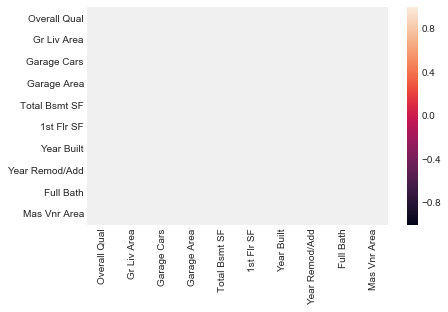

In [17]:
sns.heatmap(X_train[top_corr].corr(), vmin=-1, vmax=1);

## Sanitize `X_test`

In [18]:
X_test[top_corr].isnull().sum()

Overall Qual      0
Gr Liv Area       0
Garage Cars       1
Garage Area       1
Total Bsmt SF     0
1st Flr SF        0
Year Built        0
Year Remod/Add    0
Full Bath         0
Mas Vnr Area      4
dtype: int64

In [19]:
X_test['Garage Area'] = X_test['Garage Area'].fillna(0.0)

/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [20]:
X_test['Garage Cars'] = X_test['Garage Cars'].fillna(0.0)

/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [21]:
X_test['Mas Vnr Area'] = X_test['Mas Vnr Area'].fillna(0.0)

/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [22]:
X_train[top_corr].isnull().sum()

Overall Qual      0
Gr Liv Area       0
Garage Cars       0
Garage Area       0
Total Bsmt SF     0
1st Flr SF        0
Year Built        0
Year Remod/Add    0
Full Bath         0
Mas Vnr Area      0
dtype: int64

In [23]:
X_test[top_corr].isnull().sum()

Overall Qual      0
Gr Liv Area       0
Garage Cars       0
Garage Area       0
Total Bsmt SF     0
1st Flr SF        0
Year Built        0
Year Remod/Add    0
Full Bath         0
Mas Vnr Area      0
dtype: int64

# Let's try `Standard Scalar`

And then some models

In [24]:
#for the sake of my work, we are overwriting X_train and X_test

In [25]:
X_train=X_train[top_corr]
X_test=X_test[top_corr]

In [26]:
ss=StandardScaler()

ss.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
X_train_s = ss.transform(X_train)
X_test_s=ss.transform(X_test)

# Models

In [28]:
lr = LinearRegression()

lr.fit(X_train_s, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [1, 1538]

In [29]:
lr.score(X_train_s, y_train)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [30]:
lr.score(X_test_s, y_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
mean_squared_error(y_test, lr.predict(X_test_s)) ** 0.5

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

# Refit on full dataset

In [33]:
X[top_corr].isnull().sum()

Overall Qual       0
Gr Liv Area        0
Garage Cars        1
Garage Area        1
Total Bsmt SF      1
1st Flr SF         0
Year Built         0
Year Remod/Add     0
Full Bath          0
Mas Vnr Area      22
dtype: int64

In [34]:
X_new = X[top_corr].fillna(0.0)

In [35]:
ss = StandardScaler()

ss.fit (X_new)
X_new_s = ss.transform(X_new)

In [36]:
lr = LinearRegression()

lr.fit(X_new_s, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
kaggle_new = kaggle[top_corr].fillna(0.0)

In [38]:
kaggle_new_s = ss.transform(kaggle_new)

In [39]:
lr.predict(kaggle_new_s)

array([154793.65836753, 205851.29821814, 192470.89658254, 130040.43639105,
       185943.28834345,  88903.36968093, 113926.01567133, 146333.47266378,
       210374.17620583, 166819.04970057, 172027.75167778, 145122.08543295,
       167135.23451469, 275795.0511896 , 170064.14909061, 136771.80822903,
       154325.90274367, 116631.50428766, 204027.29434329, 202048.70218142,
       133193.07349171, 120947.88498008, 206057.12106578, 147985.34342783,
       209722.29496031, 110305.60387299, 131308.40550122, 133724.95679188,
       152910.91226985,  17530.70489407, 100089.78034721,  97693.58438835,
       266182.84536488, 154001.84009527, 229536.47917993, 192053.73365678,
       121872.21787084,  80681.21760648, 113764.60903196, 211261.46092758,
       167495.54954155, 215103.9420198 , 164695.99168743, 150417.5275891 ,
       225844.92556042, 103323.90155747, 223450.80485724, 110258.68065382,
       121620.96947432, 117300.32871585, 105694.29935743, 222453.46090918,
       274409.32884728, 1

# What Did We Just Do >:(

1. Imported the data and did a train-test split WITH A RANDOM STATE FOR REPORDUCIBILITY OF RESULTS *AND* MINIMIZATION OF HEADACHES
2. To simulate the process of building a model on known data and testing it on unknown data, we examined correlations just among the training data.
3. We cleaned the training data
    - Optional: dummies
4. We fit a scaler to the training data.
5. We transformed the training data.
6. We cleaned the testing data
7. We transformed the testing data with the scaler fit on the training data
8. We fit a model to the training data
9. We scored the model on the training and testing data.
10. **Because the model preformed reasonably well**, we went a head and refit it on **all** of the `train.csv` data, including fitting a scaler to all of the train data.
11. We cleaned and transformed the kaggle data.
12. We used our model trained on all the data to make predictions off the kaggle `test.csv`

# Now with 110% more Pipelines...Nutritious

- Curren `X_train` has not been standardized, so we'll be putting that inside our pipeline

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LassoCV, Lasso

In [43]:
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('lcv', LassoCV(n_alphas=500))
])

In [44]:
pipe.fit(X_train, y_train)

ValueError: X and y have inconsistent dimensions (1 != 1538)

In [45]:
kaggle_test = kaggle[top_corr].fillna(0.0)

In [46]:
X_train.columns

Index(['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area',
       'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add',
       'Full Bath', 'Mas Vnr Area'],
      dtype='object')

In [47]:
kaggle_test.columns

Index(['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area',
       'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add',
       'Full Bath', 'Mas Vnr Area'],
      dtype='object')

In [49]:
pipe.fit(X[top_corr].fillna(0.0), y)

Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lcv', LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=500, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False))])

In [50]:
pipe.predict(kaggle_test)

array([161047.2670081 , 205707.2927312 , 192967.37147042, 129722.10336269,
       183639.02414374,  88568.85418855, 111963.65685494, 143522.95432048,
       210520.09913919, 170341.89465609, 174605.05615828, 144796.18158494,
       166095.48182682, 281505.81194031, 167028.81715197, 133420.63706697,
       161480.85650196, 117723.56513628, 204404.27118856, 201505.30829675,
       131329.6891442 , 122644.64306766, 206348.21298578, 147914.50879605,
       205138.78229397, 111077.2689485 , 134123.3176648 , 132886.30349633,
       152560.36619896,  21637.69416154, 101730.51203929,  99190.22140726,
       259096.76422851, 150629.27197656, 229867.73394697, 192714.51498806,
       119828.747668  ,  81972.61553149, 112885.78883031, 212873.13593637,
       168918.37654183, 214275.31655086, 161537.19176898, 147595.96679984,
       226817.83940534, 100225.29433351, 223002.44364574, 110994.09767883,
       121099.39315624, 117826.47527179, 107044.96650528, 231017.96757264,
       273299.79509368, 1